**Arham Yunus Awan | 2430-0007**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [ ]:
# ============================================
# 1. LOAD THE DATA
# ============================================
print("=" * 60)
print("COVID-19 STATE DATA - EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Load the CSV file (update the path to where you saved it)
df = pd.read_csv('raw_data.csv')

print(f"\n✓ Data loaded successfully!")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

COVID-19 STATE DATA - EXPLORATORY DATA ANALYSIS

✓ Data loaded successfully!
Dataset shape: 20780 rows × 56 columns


In [ ]:
# ============================================
# 2. INITIAL DATA EXPLORATION
# ============================================
print("\n" + "=" * 60)
print("BASIC DATA INFORMATION")
print("=" * 60)

print("\nFirst few rows:")
print(df.head())

print("\nColumn names and types:")
print(df.dtypes)

print("\nDataset Info:")
df.info()



BASIC DATA INFORMATION

First few rows:
       date state  positive  probableCases   negative  pending  \
0  20210307    AK   56886.0            NaN        NaN      NaN   
1  20210307    AL  499819.0       107742.0  1931711.0      NaN   
2  20210307    AR  324818.0        69092.0  2480716.0      NaN   
3  20210307    AS       0.0            NaN     2140.0      NaN   
4  20210307    AZ  826454.0        56519.0  3073010.0      NaN   

  totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0        totalTestsViral         1731628.0                   33.0   
1  totalTestsPeopleViral         2323788.0                  494.0   
2        totalTestsViral         2736442.0                  335.0   
3        totalTestsViral            2140.0                    NaN   
4        totalTestsViral         7908105.0                  963.0   

   hospitalizedCumulative  ...  dataQualityGrade  deathIncrease  \
0                  1293.0  ...               NaN              0   
1            

In [ ]:
# ============================================
# 3. DATA CLEANING & PREPROCESSING
# ============================================
print("\n" + "=" * 60)
print("DATA CLEANING")
print("=" * 60)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Check for missing values
print("\nMissing values per column:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# Fill NaN values with 0 for numerical columns (common for COVID data)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

print(f"\n✓ Missing values handled")


DATA CLEANING

Missing values per column:
                             Missing Count  Percentage
dataQualityGrade                     20780  100.000000
grade                                20780  100.000000
positiveTestsPeopleAntigen           20147   96.953802
negativeTestsPeopleAntibody          19808   95.322425
totalTestsPeopleAntigen              19781   95.192493
positiveTestsPeopleAntibody          19686   94.735322
onVentilatorCumulative               19490   93.792108
negativeTestsAntibody                19322   92.983638
pending                              18642   89.711261
totalTestsPeopleAntibody             18580   89.412897
positiveTestsAntigen                 18547   89.254090
hospitalizedDischarged               17710   85.226179
positiveTestsAntibody                17434   83.897979
totalTestsAntigen                    17359   83.537055
inIcuCumulative                      16991   81.766121
totalTestsAntibody                   15991   76.953802
negativeTestsViral    

In [ ]:
# ============================================
# 4. DESCRIPTIVE STATISTICS
# ============================================
print("\n" + "=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)

# Key metrics
key_columns = ['positive', 'negative', 'death', 'totalTestResults', 'hospitalized']
available_cols = [col for col in key_columns if col in df.columns]

print("\nSummary statistics for key metrics:")
print(df[available_cols].describe())

# Total statistics
print("\n" + "-" * 60)
print("OVERALL TOTALS (All States, All Time)")
print("-" * 60)
if 'positive' in df.columns:
    print(f"Total Positive Cases: {df['positive'].sum():,.0f}")
if 'death' in df.columns:
    print(f"Total Deaths: {df['death'].sum():,.0f}")
if 'totalTestResults' in df.columns:
    print(f"Total Tests: {df['totalTestResults'].sum():,.0f}")
if 'hospitalized' in df.columns:
    print(f"Total Hospitalizations: {df['hospitalized'].sum():,.0f}")


DESCRIPTIVE STATISTICS

Summary statistics for key metrics:
           positive      negative         death  totalTestResults  \
count  2.078000e+04  2.078000e+04  20780.000000      2.078000e+04   
mean   1.636618e+05  5.424892e+05   3531.596824      2.169466e+06   
std    3.256792e+05  1.149762e+06   6194.636505      4.423038e+06   
min    0.000000e+00  0.000000e+00      0.000000      0.000000e+00   
25%    5.266000e+03  0.000000e+00    118.000000      9.682300e+04   
50%    4.486100e+04  3.728750e+04    982.000000      6.424245e+05   
75%    1.756140e+05  5.322208e+05   4159.000000      2.243481e+06   
max    3.501394e+06  1.018694e+07  54124.000000      4.964601e+07   

       hospitalized  
count  20780.000000  
mean    5519.322666  
std    10750.201894  
min        0.000000  
25%        0.000000  
50%      462.000000  
75%     6411.000000  
max    82237.000000  

------------------------------------------------------------
OVERALL TOTALS (All States, All Time)
-------------------

In [ ]:
# ============================================
# 5. STATE-WISE ANALYSIS
# ============================================
print("\n" + "=" * 60)
print("STATE-WISE ANALYSIS")
print("=" * 60)

# Top 10 states by total positive cases
if 'positive' in df.columns and 'state' in df.columns:
    state_totals = df.groupby('state')['positive'].max().sort_values(ascending=False)
    print("\nTop 10 States by Total Positive Cases:")
    print(state_totals.head(10))



STATE-WISE ANALYSIS

Top 10 States by Total Positive Cases:
state
CA    3501394.0
TX    2686818.0
FL    1909209.0
NY    1681169.0
IL    1198335.0
GA    1023487.0
OH     978471.0
PA     948643.0
NC     872176.0
AZ     826454.0
Name: positive, dtype: float64



GENERATING VISUALIZATIONS

✓ Visualizations saved as 'covid_eda_analysis.png'


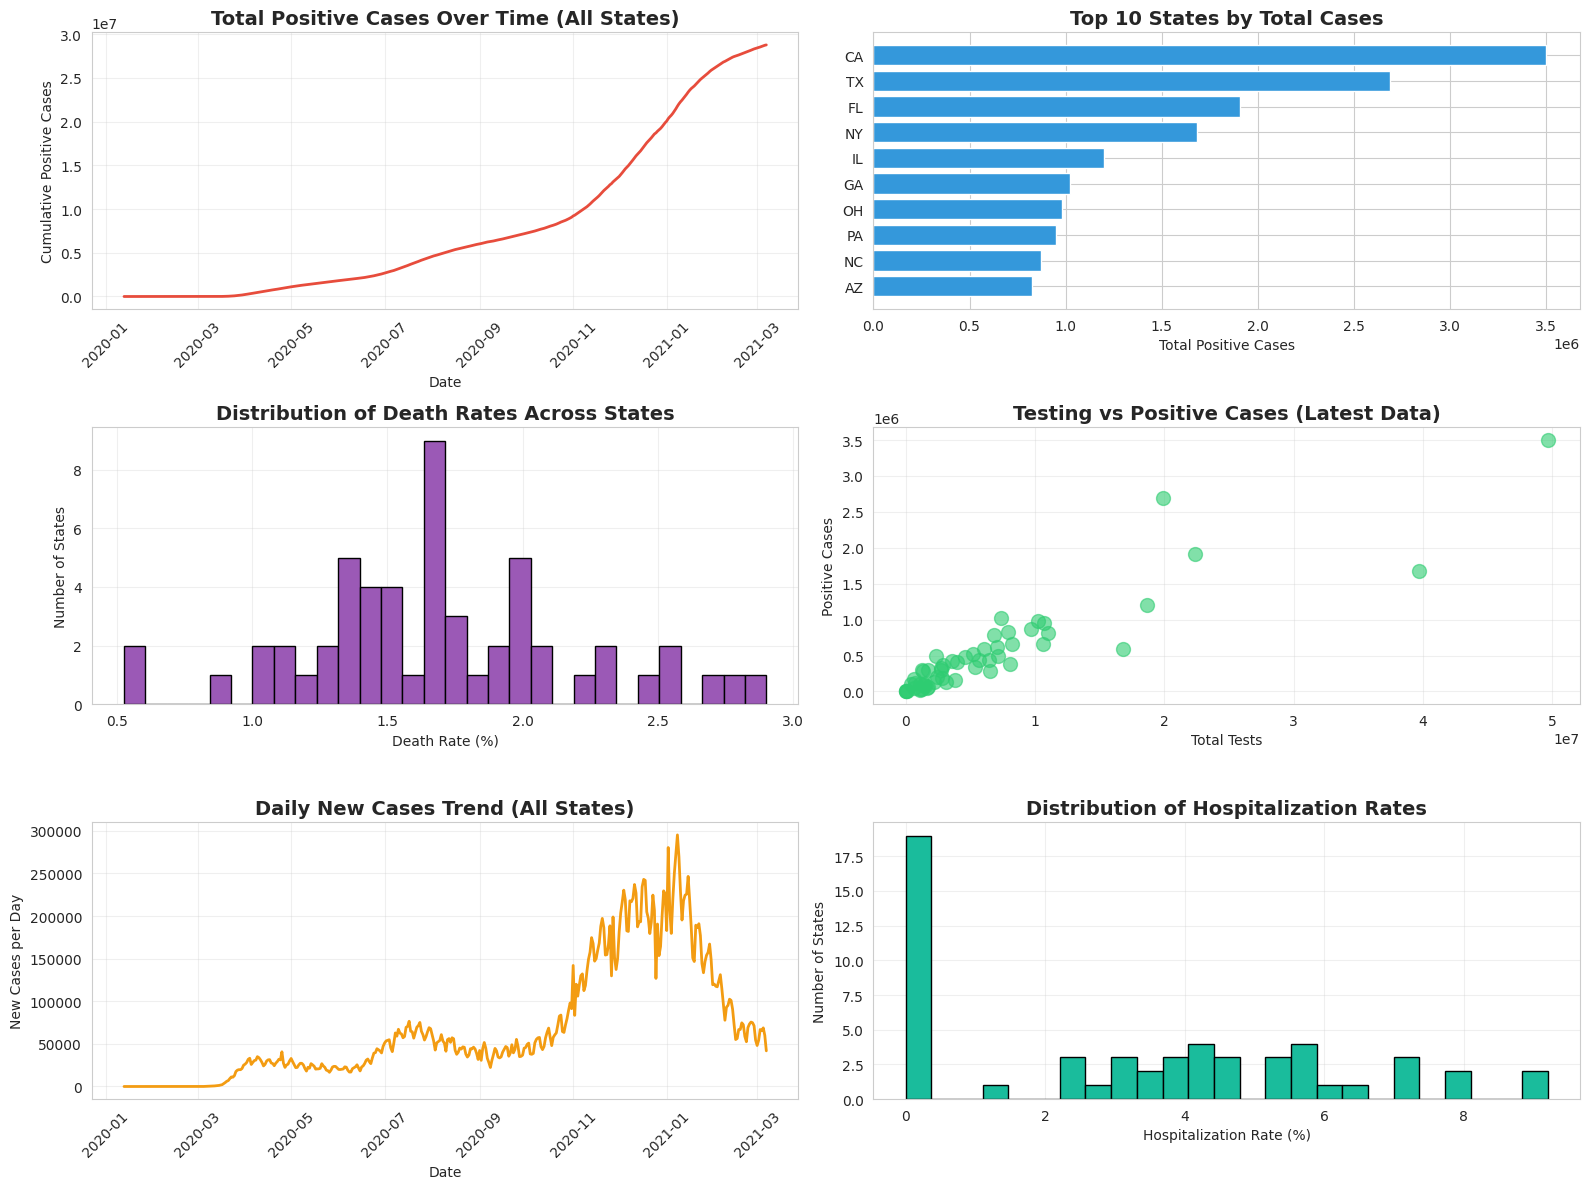

In [ ]:
# ============================================
# 6. VISUALIZATIONS
# ============================================
print("\n" + "=" * 60)
print("GENERATING VISUALIZATIONS")
print("=" * 60)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# Visualization 1: Time Series - National Daily Cases
if 'positive' in df.columns:
    plt.subplot(3, 2, 1)
    daily_cases = df.groupby('date')['positive'].sum()
    plt.plot(daily_cases.index, daily_cases.values, linewidth=2, color='#e74c3c')
    plt.title('Total Positive Cases Over Time (All States)', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Positive Cases')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

# Visualization 2: Top 10 States Bar Chart
if 'positive' in df.columns and 'state' in df.columns:
    plt.subplot(3, 2, 2)
    top_states = df.groupby('state')['positive'].max().sort_values(ascending=False).head(10)
    plt.barh(range(len(top_states)), top_states.values, color='#3498db')
    plt.yticks(range(len(top_states)), top_states.index)
    plt.xlabel('Total Positive Cases')
    plt.title('Top 10 States by Total Cases', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

# Visualization 3: Death Rate Distribution
if 'positive' in df.columns and 'death' in df.columns:
    plt.subplot(3, 2, 3)
    # Calculate death rate per state (latest data point)
    latest_data = df.sort_values('date').groupby('state').last()
    latest_data['death_rate'] = (latest_data['death'] / latest_data['positive'] * 100).replace([np.inf, -np.inf], np.nan)
    plt.hist(latest_data['death_rate'].dropna(), bins=30, color='#9b59b6', edgecolor='black')
    plt.xlabel('Death Rate (%)')
    plt.ylabel('Number of States')
    plt.title('Distribution of Death Rates Across States', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

# Visualization 4: Testing vs Positive Cases Correlation
if 'totalTestResults' in df.columns and 'positive' in df.columns:
    plt.subplot(3, 2, 4)
    latest_data = df.sort_values('date').groupby('state').last()
    plt.scatter(latest_data['totalTestResults'], latest_data['positive'], alpha=0.6, s=100, color='#2ecc71')
    plt.xlabel('Total Tests')
    plt.ylabel('Positive Cases')
    plt.title('Testing vs Positive Cases (Latest Data)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

# Visualization 5: Daily New Cases Trend
if 'positive' in df.columns:
    plt.subplot(3, 2, 5)
    daily_national = df.groupby('date')['positive'].sum()
    daily_new = daily_national.diff().fillna(0)
    plt.plot(daily_new.index, daily_new.values, linewidth=2, color='#f39c12')
    plt.title('Daily New Cases Trend (All States)', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('New Cases per Day')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

# Visualization 6: Hospitalization Rate
if 'hospitalized' in df.columns and 'positive' in df.columns:
    plt.subplot(3, 2, 6)
    latest_data = df.sort_values('date').groupby('state').last()
    latest_data['hosp_rate'] = (latest_data['hospitalized'] / latest_data['positive'] * 100).replace([np.inf, -np.inf], np.nan)
    plt.hist(latest_data['hosp_rate'].dropna(), bins=25, color='#1abc9c', edgecolor='black')
    plt.xlabel('Hospitalization Rate (%)')
    plt.ylabel('Number of States')
    plt.title('Distribution of Hospitalization Rates', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('covid_eda_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualizations saved as 'covid_eda_analysis.png'")
plt.show()


CORRELATION ANALYSIS

✓ Correlation matrix saved as 'correlation_matrix.png'


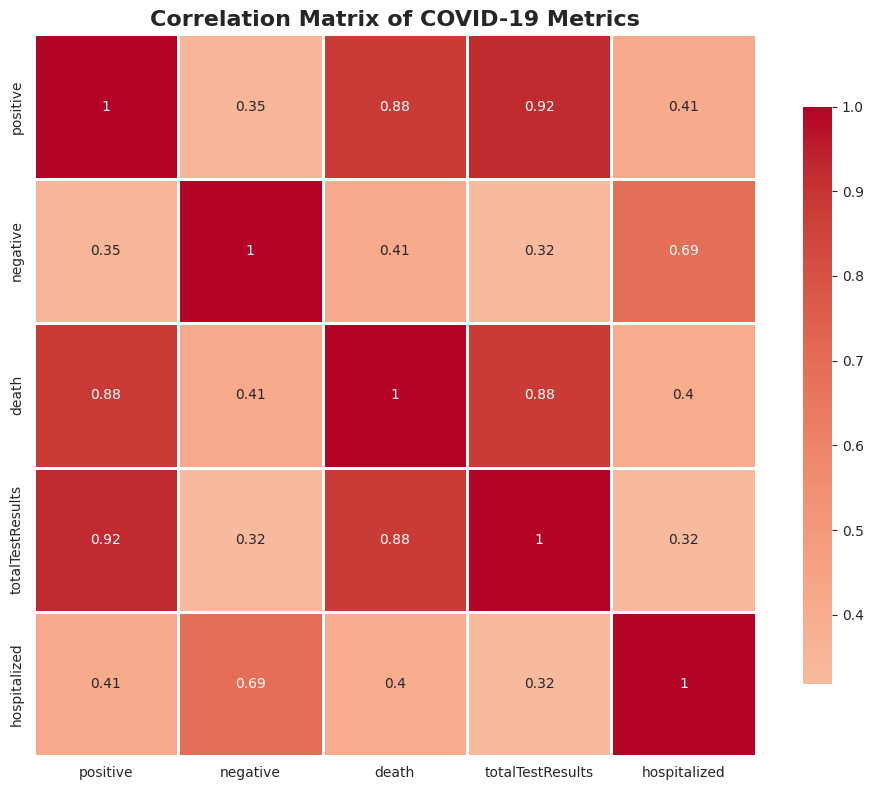


Correlation Matrix:
                  positive  negative     death  totalTestResults  hospitalized
positive          1.000000  0.349805  0.882442          0.921403      0.408333
negative          0.349805  1.000000  0.409731          0.319574      0.690931
death             0.882442  0.409731  1.000000          0.879331      0.399603
totalTestResults  0.921403  0.319574  0.879331          1.000000      0.318375
hospitalized      0.408333  0.690931  0.399603          0.318375      1.000000


In [ ]:
# ============================================
# 7. CORRELATION ANALYSIS
# ============================================
print("\n" + "=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

# Select numerical columns for correlation
corr_columns = ['positive', 'negative', 'death', 'totalTestResults', 'hospitalized']
corr_cols_available = [col for col in corr_columns if col in df.columns]

if len(corr_cols_available) > 1:
    correlation_matrix = df[corr_cols_available].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of COVID-19 Metrics', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    print("\n✓ Correlation matrix saved as 'correlation_matrix.png'")
    plt.show()

    print("\nCorrelation Matrix:")
    print(correlation_matrix)


In [ ]:
# ============================================
# 8. TIME-BASED INSIGHTS
# ============================================
print("\n" + "=" * 60)
print("TIME-BASED INSIGHTS")
print("=" * 60)

# Add month and year columns
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Monthly aggregation
if 'positive' in df.columns:
    monthly_cases = df.groupby(['year', 'month'])['positive'].sum().reset_index()
    print("\nMonthly case progression:")
    print(monthly_cases.tail(12))

print("\n" + "=" * 60)
print("EDA COMPLETE!")
print("=" * 60)
print("\n📊 Generated Files:")
print("  - covid_eda_analysis.png (6 visualizations)")
print("  - correlation_matrix.png (correlation heatmap)")
print("=" * 60)


TIME-BASED INSIGHTS

Monthly case progression:
    year  month     positive
3   2020      4   19610160.0
4   2020      5   45273840.0
5   2020      6   64577037.0
6   2020      7  110431975.0
7   2020      8  165003108.0
8   2020      9  197441612.0
9   2020     10  248879799.0
10  2020     11  336941092.0
11  2020     12  522459627.0
12  2021      1  722878471.0
13  2021      2  766103297.0
14  2021      3  200084809.0

EDA COMPLETE!

📊 Generated Files:
  - covid_eda_analysis.png (6 visualizations)
  - correlation_matrix.png (correlation heatmap)
